In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

import plotly.express as px
import folium 
import folium.plugins

In [7]:
dt1 = pd.read_csv('data/trip_data/trip_data_1.csv', nrows=100000)
# dt2 = pd.read_csv('data/trip_data/trip_data_2.csv')

df1 = pd.read_csv('data/trip_fare/trip_fare_1.csv', nrows=100000)
# df2 = pd.read_csv('data/trip_fare/trip_fare_2.csv')

In [8]:
dt1.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.042100,2.162990,650.635630,2.985963,-72.655747,40.048650,-72.553172,39.922439
std,0.285497,1.739883,469.565019,3.595586,9.783964,5.795519,10.154303,14.806449
min,1.000000,0.000000,0.000000,0.000000,-98.116669,0.000000,-95.650002,-3113.788800
25%,1.000000,1.000000,360.000000,1.080000,-73.991608,40.735901,-73.991463,40.736163
50%,1.000000,1.000000,540.000000,1.780000,-73.980843,40.755219,-73.980721,40.755243
75%,1.000000,3.000000,840.000000,3.160000,-73.964607,40.770210,-73.963966,40.769627
max,5.000000,6.000000,9180.000000,52.880000,0.000000,646.438290,0.000000,652.723140


In [14]:
dt1.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [11]:
df1.describe()

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,12.030917,0.032800,0.498380,1.223523,0.295162,14.080782
std,10.607756,0.125874,0.028414,2.207250,1.237959,12.709415
min,2.500000,0.000000,0.000000,0.000000,0.000000,2.500000
25%,6.000000,0.000000,0.500000,0.000000,0.000000,7.380000
50%,8.500000,0.000000,0.500000,0.000000,0.000000,10.000000
75%,13.000000,0.000000,0.500000,1.700000,0.000000,14.900000
max,460.000000,1.000000,0.500000,160.000000,18.050000,460.500000


In [12]:
df1.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,2013-01-01 15:11:48,CSH,6.5,0.0,0.5,0.0,0.0,7.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-06 00:18:35,CSH,6.0,0.5,0.5,0.0,0.0,7.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-05 18:49:41,CSH,5.5,1.0,0.5,0.0,0.0,7.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:54:15,CSH,5.0,0.5,0.5,0.0,0.0,6.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:25:03,CSH,9.5,0.5,0.5,0.0,0.0,10.5


In [15]:
dt2 = pd.read_csv('data/trip_data/trip_data_2.csv', nrows=10000)

In [16]:
dt2.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,1B5C0970F2AE8CFFBA8AE4584BEAED29,D961332334524990D1BBD462E2EFB8A4,CMT,1,N,2013-02-08 23:35:14,2013-02-08 23:42:58,1,463,0.8,-73.992439,40.724487,-73.984421,40.718903
1,B42249AE16E2B8E556F1CB1F940D6FB4,D4BB308D1F3FCB3434D9DB282CDC93D7,CMT,1,N,2013-02-07 12:20:16,2013-02-07 12:50:27,4,1810,3.1,-73.989494,40.769588,-73.990303,40.737347
2,890699222C47C09FBC898758CEC69762,6318C3AEC02248928C3345B5805EB905,CMT,1,N,2013-02-08 08:56:54,2013-02-08 08:59:43,1,168,1.0,-73.963036,40.799141,-73.972168,40.786446
3,74B7D835C2CD98606D5256DA8A38E045,D5E278C918256D1F97680A1F04D290E0,CMT,1,N,2013-02-08 09:37:02,2013-02-08 09:50:50,1,828,2.1,-73.987953,40.728764,-74.007118,40.705399
4,4003B8478418FEC5D761E2F37602769B,0B766F1054A5C16D86BC023858BD8143,CMT,1,N,2013-02-08 19:31:25,2013-02-08 19:46:23,1,897,3.3,-73.987282,40.743042,-74.010284,40.703964


In [50]:
df2 = pd.read_csv('data/trip_fare/trip_fare_3.csv')

In [51]:
dates = pd.to_datetime(df2[' pickup_datetime'])

In [52]:
print(min(dates), max(dates))

2013-03-01 00:00:00 2013-03-31 23:59:58


In [53]:
df2.shape

(15749228, 11)

## Merge the DF

In [61]:
dt1 = pd.read_csv('data/trip_data/trip_data_3.csv', nrows=1000)
# dt2 = pd.read_csv('data/trip_data/trip_data_2.csv')

df1 = pd.read_csv('data/trip_fare/trip_fare_3.csv', nrows=1000)
# df2 = pd.read_csv('data/trip_fare/trip_fare_2.csv')

In [66]:
dt1.dtypes

medallion               object
 hack_license           object
 vendor_id              object
 rate_code               int64
 store_and_fwd_flag     object
 pickup_datetime        object
 dropoff_datetime       object
 passenger_count         int64
 trip_time_in_secs       int64
 trip_distance         float64
 pickup_longitude      float64
 pickup_latitude       float64
 dropoff_longitude     float64
 dropoff_latitude      float64
dtype: object

In [67]:
df1.dtypes

medallion            object
 hack_license        object
 vendor_id           object
 pickup_datetime     object
 payment_type        object
 fare_amount        float64
 surcharge          float64
 mta_tax            float64
 tip_amount         float64
 tolls_amount       float64
 total_amount       float64
dtype: object

In [56]:
dt1

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,FE7B354FEB67B9C94BD34EA54469691C,2C78614ADC9C602EC70D65CCB4E63B14,CMT,1,N,2013-03-01 00:00:04,2013-03-01 00:19:03,1,1138,14.30,-73.776703,40.645164,-73.913925,40.772614
1,B1370E6501ED61CEDA0160199AF7708C,08BF18740B38D64720C9E060429A3968,CMT,1,N,2013-03-01 00:00:18,2013-03-01 00:12:11,1,712,3.30,-73.987343,40.752056,-73.965340,40.792721
2,CBC20164C22B96CAF5BC86C49F749DBB,F3310C8DA3DB753DDB5800F32D3CB8E3,CMT,1,N,2013-03-01 00:00:18,2013-03-01 00:14:24,1,845,4.50,-73.991493,40.726444,-73.980865,40.778370
3,B8256802A449BEF34E161654BFA8A2B6,DF142C5256392C3CDA67C7DFFA5B88E2,CMT,1,N,2013-03-01 00:00:23,2013-03-01 00:14:56,1,872,9.00,-73.873108,40.774094,-73.960930,40.769535
4,0F9E0728AB1E40D5CEB0C6EDBF805CCB,10D2E58D75E07D6B5AAFA329BF5A4CAC,CMT,1,N,2013-03-01 00:00:35,2013-03-01 00:05:44,1,308,1.30,-73.990562,40.750927,-73.982880,40.739132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,E39E422DA1411C2E5DC05282C1D371B3,2B63532F779B2C53891FA6AFE593E55E,VTS,1,NaN,2013-03-24 21:59:00,2013-03-24 22:07:00,5,480,2.05,-73.989426,40.748417,-73.964005,40.756546
996,C5AADDB89C535DB639E0296EF40062E4,390AE0D7D7823D99CA9F71F6F4CCC5E6,VTS,1,NaN,2013-03-24 21:57:00,2013-03-24 22:08:00,6,660,1.97,-73.966125,40.758312,-73.993340,40.756031
997,198CE3EF5EE01960EE8CEB9CF9D1B0E1,BF3544AD02805D369B57E19060DE1C6E,VTS,1,NaN,2013-03-21 20:29:00,2013-03-21 20:49:00,5,1200,5.15,-73.977310,40.752064,-73.944572,40.720348
998,D5FED3ADE21263C3811669ED955FCBC9,0B7A011283C9C21CE8B224F89CAFA69D,VTS,1,NaN,2013-03-21 20:39:00,2013-03-21 20:48:00,5,540,1.56,-73.979156,40.752884,-73.988182,40.738468


In [59]:
dt1[' pickup_datetime'] = pd.to_datetime(dt1[' pickup_datetime'])
df1[' pickup_datetime'] = pd.to_datetime(df1[' pickup_datetime'])


In [64]:
temp1 = dt1.merge(df2)

In [75]:
temp2 = pd.merge(dt1, df1, how='left', on=['medallion', ' hack_license', ' vendor_id', ' pickup_datetime'])

In [76]:
temp2

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,FE7B354FEB67B9C94BD34EA54469691C,2C78614ADC9C602EC70D65CCB4E63B14,CMT,1,N,2013-03-01 00:00:04,2013-03-01 00:19:03,1,1138,14.30,...,40.645164,-73.913925,40.772614,CRD,39.5,0.5,0.5,10.10,0.0,50.60
1,B1370E6501ED61CEDA0160199AF7708C,08BF18740B38D64720C9E060429A3968,CMT,1,N,2013-03-01 00:00:18,2013-03-01 00:12:11,1,712,3.30,...,40.752056,-73.965340,40.792721,CRD,13.0,0.5,0.5,2.10,0.0,16.10
2,CBC20164C22B96CAF5BC86C49F749DBB,F3310C8DA3DB753DDB5800F32D3CB8E3,CMT,1,N,2013-03-01 00:00:18,2013-03-01 00:14:24,1,845,4.50,...,40.726444,-73.980865,40.778370,CRD,15.0,0.5,0.5,3.20,0.0,19.20
3,B8256802A449BEF34E161654BFA8A2B6,DF142C5256392C3CDA67C7DFFA5B88E2,CMT,1,N,2013-03-01 00:00:23,2013-03-01 00:14:56,1,872,9.00,...,40.774094,-73.960930,40.769535,CRD,25.5,0.5,0.5,6.26,4.8,37.56
4,0F9E0728AB1E40D5CEB0C6EDBF805CCB,10D2E58D75E07D6B5AAFA329BF5A4CAC,CMT,1,N,2013-03-01 00:00:35,2013-03-01 00:05:44,1,308,1.30,...,40.750927,-73.982880,40.739132,CRD,6.5,0.5,0.5,1.00,0.0,8.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,E39E422DA1411C2E5DC05282C1D371B3,2B63532F779B2C53891FA6AFE593E55E,VTS,1,NaN,2013-03-24 21:59:00,2013-03-24 22:07:00,5,480,2.05,...,40.748417,-73.964005,40.756546,CRD,8.5,0.5,0.5,1.80,0.0,11.30
996,C5AADDB89C535DB639E0296EF40062E4,390AE0D7D7823D99CA9F71F6F4CCC5E6,VTS,1,NaN,2013-03-24 21:57:00,2013-03-24 22:08:00,6,660,1.97,...,40.758312,-73.993340,40.756031,CSH,9.5,0.5,0.5,0.00,0.0,10.50
997,198CE3EF5EE01960EE8CEB9CF9D1B0E1,BF3544AD02805D369B57E19060DE1C6E,VTS,1,NaN,2013-03-21 20:29:00,2013-03-21 20:49:00,5,1200,5.15,...,40.752064,-73.944572,40.720348,CRD,19.5,0.5,0.5,4.00,0.0,24.50
998,D5FED3ADE21263C3811669ED955FCBC9,0B7A011283C9C21CE8B224F89CAFA69D,VTS,1,NaN,2013-03-21 20:39:00,2013-03-21 20:48:00,5,540,1.56,...,40.752884,-73.988182,40.738468,CRD,8.0,0.5,0.5,2.12,0.0,11.12


In [71]:
dt1.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,FE7B354FEB67B9C94BD34EA54469691C,2C78614ADC9C602EC70D65CCB4E63B14,CMT,1,N,2013-03-01 00:00:04,2013-03-01 00:19:03,1,1138,14.3,-73.776703,40.645164,-73.913925,40.772614
1,B1370E6501ED61CEDA0160199AF7708C,08BF18740B38D64720C9E060429A3968,CMT,1,N,2013-03-01 00:00:18,2013-03-01 00:12:11,1,712,3.3,-73.987343,40.752056,-73.965340,40.792721
2,CBC20164C22B96CAF5BC86C49F749DBB,F3310C8DA3DB753DDB5800F32D3CB8E3,CMT,1,N,2013-03-01 00:00:18,2013-03-01 00:14:24,1,845,4.5,-73.991493,40.726444,-73.980865,40.778370
3,B8256802A449BEF34E161654BFA8A2B6,DF142C5256392C3CDA67C7DFFA5B88E2,CMT,1,N,2013-03-01 00:00:23,2013-03-01 00:14:56,1,872,9.0,-73.873108,40.774094,-73.960930,40.769535
4,0F9E0728AB1E40D5CEB0C6EDBF805CCB,10D2E58D75E07D6B5AAFA329BF5A4CAC,CMT,1,N,2013-03-01 00:00:35,2013-03-01 00:05:44,1,308,1.3,-73.990562,40.750927,-73.982880,40.739132


In [72]:
df1.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,FE7B354FEB67B9C94BD34EA54469691C,2C78614ADC9C602EC70D65CCB4E63B14,CMT,2013-03-01 00:00:04,CRD,39.5,0.5,0.5,10.10,0.0,50.60
1,B1370E6501ED61CEDA0160199AF7708C,08BF18740B38D64720C9E060429A3968,CMT,2013-03-01 00:00:18,CRD,13.0,0.5,0.5,2.10,0.0,16.10
2,CBC20164C22B96CAF5BC86C49F749DBB,F3310C8DA3DB753DDB5800F32D3CB8E3,CMT,2013-03-01 00:00:18,CRD,15.0,0.5,0.5,3.20,0.0,19.20
3,B8256802A449BEF34E161654BFA8A2B6,DF142C5256392C3CDA67C7DFFA5B88E2,CMT,2013-03-01 00:00:23,CRD,25.5,0.5,0.5,6.26,4.8,37.56
4,0F9E0728AB1E40D5CEB0C6EDBF805CCB,10D2E58D75E07D6B5AAFA329BF5A4CAC,CMT,2013-03-01 00:00:35,CRD,6.5,0.5,0.5,1.00,0.0,8.50


In [74]:
temp2.dtypes

medallion               object
 hack_license           object
 vendor_id              object
 rate_code               int64
 store_and_fwd_flag     object
 pickup_datetime        object
 dropoff_datetime       object
 passenger_count         int64
 trip_time_in_secs       int64
 trip_distance         float64
 pickup_longitude      float64
 pickup_latitude       float64
 dropoff_longitude     float64
 dropoff_latitude      float64
 payment_type           object
 fare_amount           float64
 surcharge             float64
 mta_tax               float64
 tip_amount            float64
 tolls_amount          float64
 total_amount          float64
dtype: object

INITIAL PLOTS

In [108]:
dt1 = pd.read_csv('data/trip_data/trip_data_3.csv', nrows=10000)
# dt2 = pd.read_csv('data/trip_data/trip_data_2.csv')

df1 = pd.read_csv('data/trip_fare/trip_fare_3.csv', nrows=10000)
# df2 = pd.read_csv('data/trip_fare/trip_fare_2.csv')
temp2 = pd.merge(dt1, df1, how='left', on=['medallion', ' hack_license', ' vendor_id', ' pickup_datetime'])

In [109]:
fig = px.histogram(temp2[' trip_time_in_secs']/60, labels={
    "value": "Trip Duration (s)", "count": "Sepal Width (cm)"})

# hiding legend in pyplot express.
fig.update_layout(showlegend=False, xaxis_title="Counting",
                  yaxis_title="Y Axis",
                  legend_title="Legend Title")

# showing the plot
fig.show()

In [110]:
fig = px.scatter(x=temp2[' trip_time_in_secs']/60, y=temp2[' trip_distance'])

# hiding legend in pyplot express.
fig.update_layout(showlegend=False, xaxis_title="Time (m)",
                  yaxis_title="Distance",
                  legend_title="Legend Title")

# showing the plot
fig.show()

In [3]:
# data loading and cleaning
dt1 = pd.read_csv('data/trip_data/trip_data_3.csv', nrows=100000)
dt1.drop(columns=' store_and_fwd_flag', inplace=True)
# dt2 = pd.read_csv('data/trip_data/trip_data_2.csv')

df1 = pd.read_csv('data/trip_fare/trip_fare_3.csv', nrows=100000)
# df2 = pd.read_csv('data/trip_fare/trip_fare_2.csv')
df = pd.merge(dt1, df1, how='left', on=['medallion', ' hack_license', ' vendor_id', ' pickup_datetime'])
for i in df.columns:
    df.rename(columns={i : i.strip(' ')}, inplace=True)
df['trip_time'] = df['trip_time_in_secs']/60
coord = ['pickup_longitude','pickup_latitude', 
         'dropoff_longitude', 'dropoff_latitude']

for i in coord :
    df[i] = df[i].replace(0,np.nan)
df.dropna(inplace=True)
# drop observations less than 0 and  greater than 99.9% percentile value.
df = df[(df["fare_amount"] > 0) & (
    df["fare_amount"] < df["fare_amount"].quantile(.999))]

df = df[(df["trip_distance"] > 0) & (
    df["trip_distance"] < df["trip_distance"].quantile(.9999))]

df = df[(df["trip_time_in_secs"] > 0) & (
    df["trip_time_in_secs"] < df["trip_time_in_secs"].quantile(.9999))]

for i in coord:
    df = df[(df[i] > df[i].quantile(.001)) &
            (df[i] < df[i].quantile(.999))]

In [5]:
df.dtypes

medallion             object
hack_license          object
vendor_id             object
rate_code              int64
pickup_datetime       object
dropoff_datetime      object
passenger_count        int64
trip_time_in_secs      int64
trip_distance        float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
payment_type          object
fare_amount          float64
surcharge            float64
mta_tax              float64
tip_amount           float64
tolls_amount         float64
total_amount         float64
trip_time            float64
dtype: object

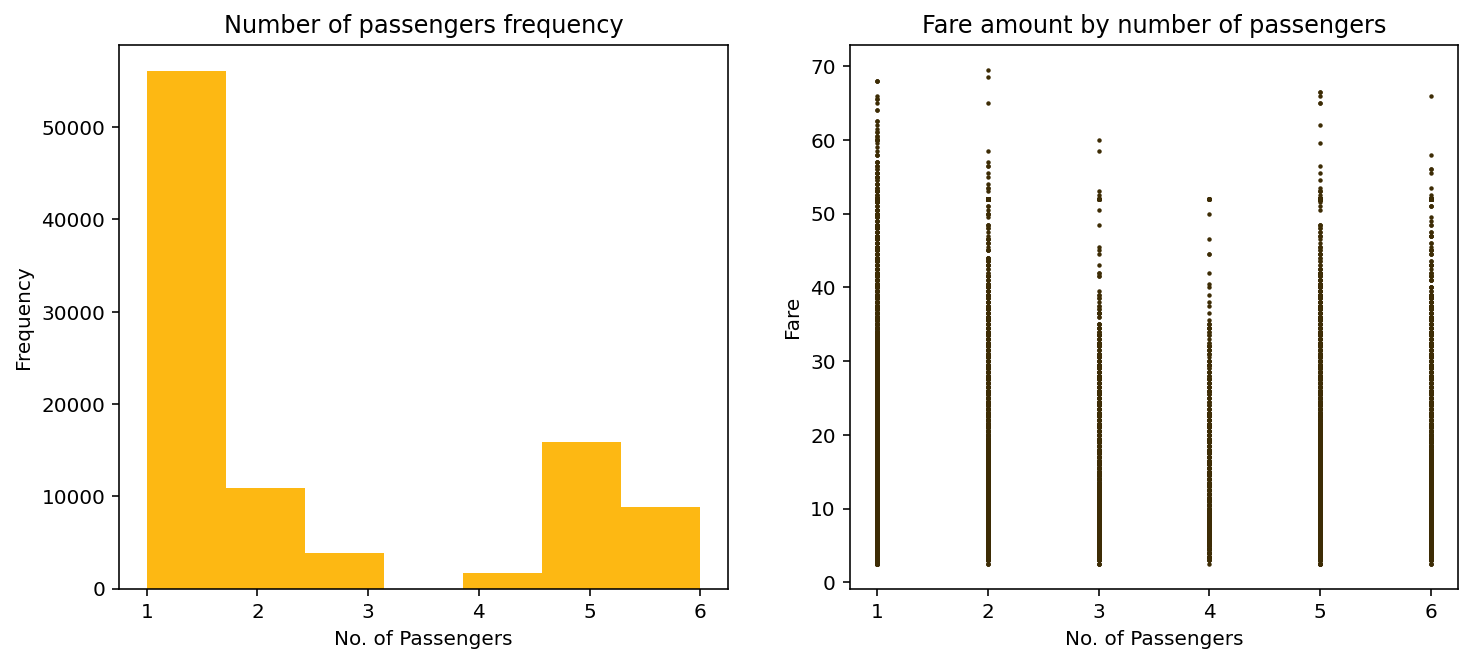

In [8]:
f, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].hist(df["passenger_count"], bins=7, color=("#fdb813"))
ax[0].set_title("Number of passengers frequency")
ax[0].set_xlabel('No. of Passengers')
ax[0].set_ylabel('Frequency')

ax[1].scatter(x=df["passenger_count"], y=df["fare_amount"], s=1.5, 
              color=("#3D2C05"))
ax[1].set_title("Fare amount by number of passengers")
ax[1].set_xlabel('No. of Passengers')
ax[1].set_ylabel('Fare');


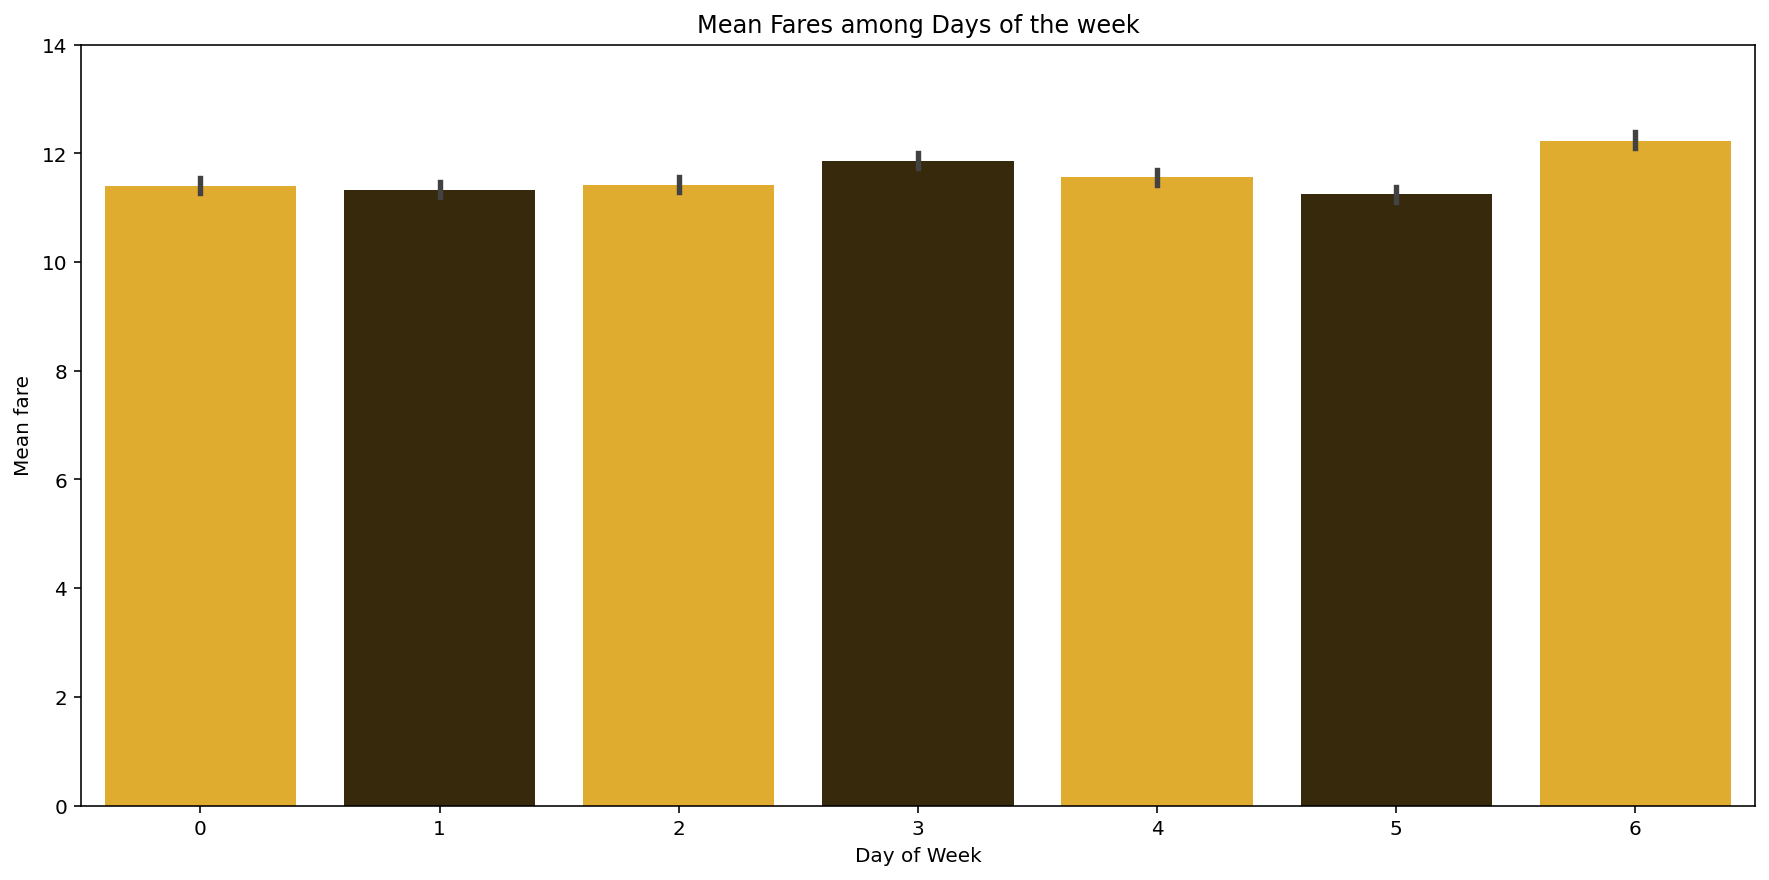

In [13]:
plt.figure(figsize=(15,7))
sns.barplot(x='dayOfWeek', y="fare_amount", data=df, palette=("#fdb813", "#3D2C05"))
plt.ylim(0, 14)
plt.title("Mean Fares among Days of the week")
plt.xlabel('Day of Week')
plt.ylabel('Mean fare')
plt.show()